<h1><center> 
    Travaux pratiques:
    
       Interpolation, Intégration numérique 
    et régression linéaire

</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Interpolation

## 1.1 Interpolation Lagrange

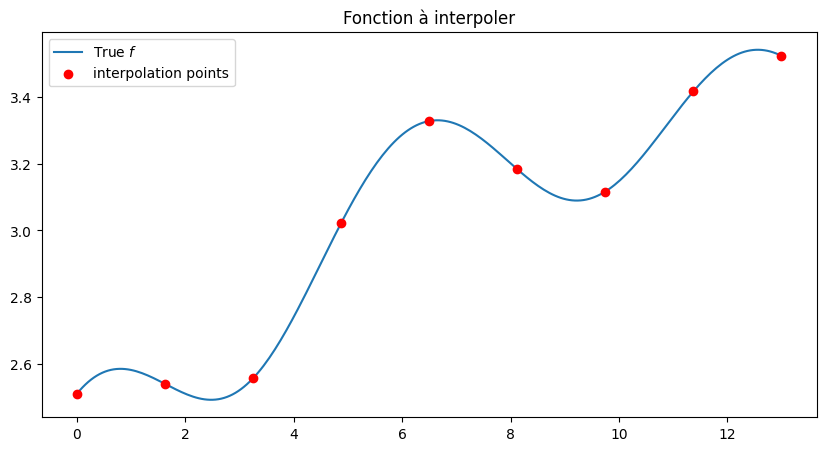

In [2]:
def f(x):
    return np.sqrt(x + 5 + 1.3*np.cos(x**1)- x**2/25)

N = 250
xx = np.linspace(0,13, N)

n = 9
x_interp = np.linspace(0,13, n)

plt.figure(figsize=(10,5))
plt.title("Fonction à interpoler")
plt.plot(xx,f(xx),label=f'True $f$')
plt.scatter(x_interp,f(x_interp),c='r',zorder=3,label='interpolation points');
plt.legend();

In [3]:
class LagrangeInterpolation:
    """
    Classe d'interpolation de Lagrange
    """
    def __init__(self, xinterp, yinterp):
        """
        xinit: abscisses des points d'interpolations
        yinit: ordonnées des points d'interpolations
        """
        
        self.xinterp = xinterp
        self.yinterp = yinterp
        self.n = len(xinterp)
        
        # Construction des polynômes de lagrange en chaque point
        self.lagrange_polynomials = [LagrangeInterpolation.PolynomeBuilder(self.xinterp, i) for i in range(self.n)]
        
        # Construction du polynôme d'interpolation final
        self.interpolation = self._interpolation_polynome_builder()

    def PolynomeBuilder(xinterp, i):
        def Li(xx): 
            """
            Fonction qui renvoie le polynome de Lagrange au point d'abscisse self.xinterp[i].
            Ce polynôme vaut 1 en self.xinterp[i] et 0 en self.xinterp[j] pour j != i. 
            """
            xi = xinterp[i]
            ...
            
            return ...
        return Li
        
    def _interpolation_polynome_builder(self):
        """
        Combine tous les polynômes de Lagrange pour renvoyer le polynôme d'interpolation final.
        """
        def polynome(xx):
            return ...
        return polynome
    
    def __call__(self, xx):
        """
        Permet d'appeler l'instance de classe.
        """
        return self.interpolation(xx)

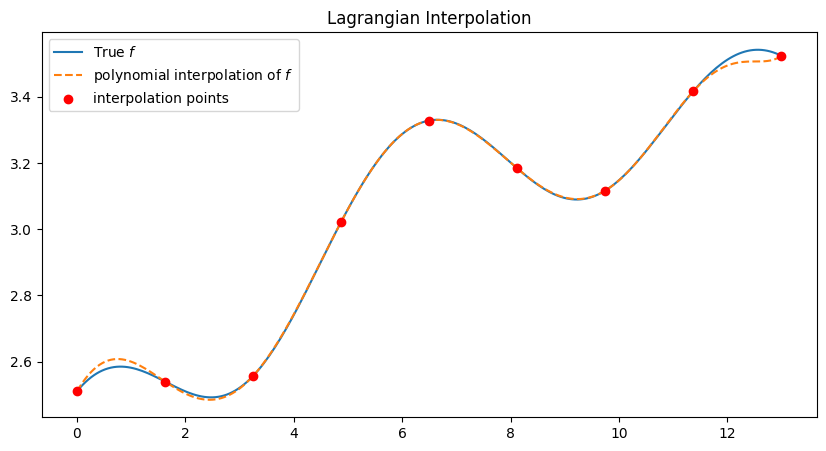

In [4]:
n = 9
x_interp = np.linspace(0,13, n)


li = LagrangeInterpolation(x_interp, f(x_interp))

plt.figure(figsize=(10,5))
plt.plot(xx,f(xx),label=f'True $f$')
plt.title("Lagrangian Interpolation")
plt.plot(xx, li(xx),linestyle='--',label=r'polynomial interpolation of $f$');
plt.scatter(x_interp,f(x_interp),c='r',zorder=3,label='interpolation points');
plt.legend();

## 1.2 Interpolation Cubic Spline

In [5]:
class CubicSpline:
    """
    Classe d'interpolation CubicSpline
    """
    def __init__(self, x_interp, y_interp):
        """
        x_interp: abscisses d'interpolation
        y_interp: f(x_interp)
        """
        self.x_interp = x_interp
        self.y_interp = y_interp
        
        self.n = len(x_interp) - 1
        
        # Calcul des coefficients des polynômes cubiques.
        self.coeffs = self._get_coeffs()
        
        # Construction des fonctions indicatrices
        self.indicatrices = [self._get_indicatrice(i) for i in range(self.n)]
        
        #Construction des polynômes cubiques.
        self.cubic_polys = [self._get_cubic_poly(i) for i in range(self.n)]

    def _get_coeffs(self):
        """
        Calcule les coefficients des polynômes cubiques
        """
        n = len(x_interp) - 1
        
        # Construction de A
        h = self.x_interp[1:] - self.x_interp[:-1]
        null_block = np.zeros((n,n))
        block_1 = np.diag(np.ones(n)) - np.diag(np.ones(n-1),k=1)
        block_1[-1,:] = 0
        block_h = np.diag(list(h))
        block_h_trunc = np.diag(list(h[:-1]) + [0])
        I = np.eye(n)
        
        
        # Remplissage de la matrice A
        A = np.block(...)
        
        # Conditions aux bords
        A[3*n-1,n]=1 ; A[3*n-1,3*n-1]= -2*h[-1] ; 
        A[4*n-1,2*n] = 1;A[4*n-1,3*n-1] = -1; A[4*n-1,-1] = 3*h[-1]
        
        # Construction de b (coefficients a, puis b, puis c, puis d)
        b1 = self.y_interp[:-1]
        b2 = self.y_interp[1:]
        b3 = np.zeros_like(b1)
        b4 = np.zeros_like(b1)
        b = np.hstack((b1,b2,b3,b4))
        
        X = np.linalg.solve(A,b)
        coeffs = X.reshape((4,n))
        
        return coeffs


    def _get_indicatrice(self, i):
        """
        Renvoie la fonction indicatrice qui vaut 1 sur [x_i, x_{i+1}[ et 0 ailleurs.
        """
        xi = self.x_interp[i]
        xip = self.x_interp[i+1]
        if i < self.n-1:
            def ind_i(xx):
                return ((xi <= xx)*1.0) * ((xx < xip)*1.0)
        else:
            def ind_i(xx):
                return ((xi <= xx)*1.0) * ((xx <= xip)*1.0)
        return ind_i
    
    def _get_cubic_poly(self,i):
        """
        Renvoie le i-ème polynôme cubique sur le segment [x_i, x_{i+1}[, obtenu
        à partir des coefficients stockés dans self.coeffs.
        """
        a = self.coeffs[0][i]
        b = self.coeffs[1][i]
        c = self.coeffs[2][i]
        d = self.coeffs[3][i]
        xi = self.x_interp[i]
        def cubic_poly(xx):
            return ...
        
        return cubic_poly
    
    def __call__(self, xx):
        """
        Permet d'appeler l'instance sur des abscisses.
        """
        out = [indicatrice(xx)*cubic_poly(xx) for (yi, indicatrice, cubic_poly) in zip(self.y_interp,
                                                                                         self.indicatrices,
                                                                                         self.cubic_polys)]
        return np.sum(out,axis=0)

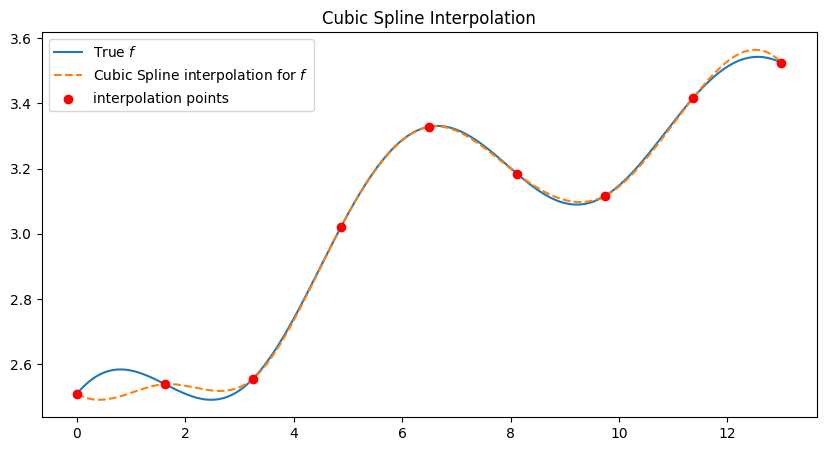

In [6]:
n = 9
x_interp = np.linspace(0, 13, n)

finterp = CubicSpline(x_interp, f(x_interp))

plt.figure(figsize=(10,5))
plt.title("Cubic Spline Interpolation")
plt.plot(xx,f(xx),label=f'True $f$')
plt.plot(xx, finterp(xx),linestyle='--',label=r'Cubic Spline interpolation for $f$');
plt.scatter(x_interp, f(x_interp),c='r',zorder=3,label='interpolation points');
plt.legend();

# 2. Intégration Numérique

__Objectif:__ approximer l'intégrale suivante
$$,
I = \int_0^1 x^p dx = \frac{1}{p+1},
$$

pour $p=4$.


#### Sommes de Darboux pour $y=x^2$ sur l'intervalle $[0,1]$

Inférieure             | Supérieure
:-------------------------:|:-------------------------:
![](../data/Riemann_Integration_and_Darboux_Lower_Sums.gif)  |  ![](../data/Riemann_Integration_and_Darboux_Upper_Sums.gif)


[source Wikipédia](https://fr.wikipedia.org/wiki/Int%C3%A9grale_de_Darboux#:~:text=Plus%20concr%C3%A8tement%2C%20pour%20une%20subdivision,sous%2Dintervalle%20de%20la%20subdivision.)

## 2.1 Coder les formules de quadratures

Coder des fonctions appliquant les formules de quadrature à une fonction `f`, sur `N` rectangles entre les points d'abscisses `a` et `b`
- `rect_gauche(f, N, a=0, b=1)`
- `pt_milieu(f, N, a=0, b=1)`
- `simpson(f, N, a=0, b=1)`

In [7]:
import numpy as np

p=4
def power(x):
    """fonction carrée"""
    return x**p


def rect_gauche(f, N, a=0, b=1):
    """Applique la méthode des rectangles a gauche pour f sur n rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(...):
        ...

    return I


def pt_milieu(f, N, a=0, b=1):
    """Applique la méthode du point milieu pour f sur n rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(...):
        ...
    return I


def simpson(f, N, a=0, b=1):
    """Applique la méthode de Simpson pour f sur n rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(...):
        ...
    return I


N = 10**4
rect_gauche(power, N )

0.19994999833349997

## 2.2 Vérifier l'ordre des méthodes

Calculer pour chaque formule de quadrature, pour les nombres de rectangles $N= 10, 10^2, 10^3, 10^4$

l'erreur d'approximation donnée par :
$$
\varepsilon_n^{méthode} = |J^{méthode}_n - I|.
$$

Plotter pour chaque méthode, l'erreur d'approximation en fonction du nombre de rectangles $N$.

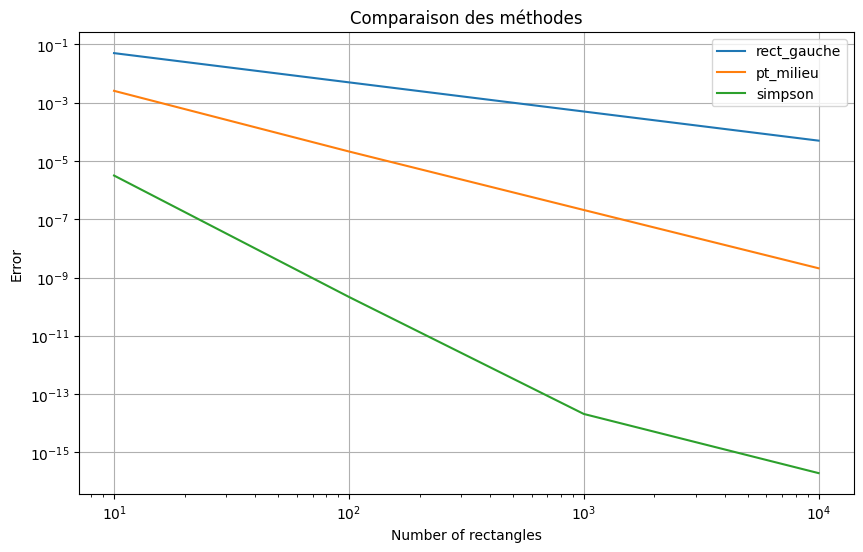

In [8]:
Ns = [10**i for i in range(1,5)]

methodes = [rect_gauche, pt_milieu, simpson]

plt.figure(figsize=(10,6))
p=5
for methode in methodes:    
    erreurs = []
    for N in Ns:
        approx_num = methode(power, N)
        erreur = abs(approx_num - 1/(p+1))
        erreurs.append(erreur)

    plt.plot(Ns, erreurs,label=methode.__name__)



plt.loglog();
plt.legend();
plt.grid(); plt.xlabel("Number of rectangles"); plt.ylabel('Error');
plt.title("Comparaison des méthodes");

# 3. Régréssion linéaire

## 3.1 Création d'un jeu de données synthétique

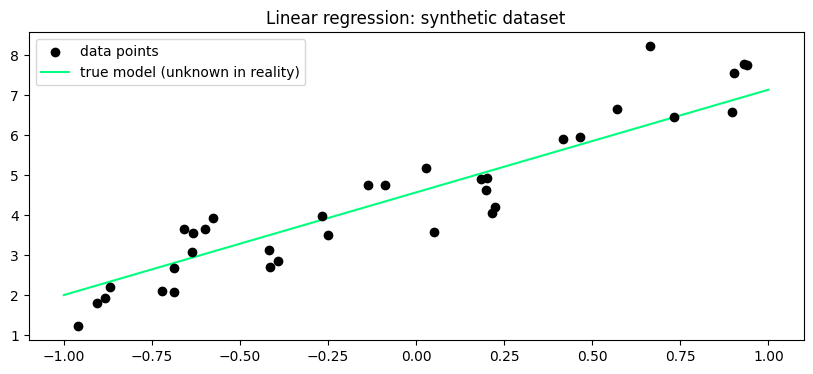

In [9]:
n = 35
np.random.seed(42)
x = np.random.uniform(-1,1,n)

a_true = +2.564496
b_true = +4.569355

def true_model(x):
    return a_true*x + b_true

y = true_model(x) + np.random.normal(0,0.7,n)


N = 300
xx = np.linspace(-1,1, N)

plt.figure(figsize=(10,4))
plt.scatter(x,y,label='data points',c='k');
plt.title("Linear regression: synthetic dataset")
plt.plot(xx,true_model(xx),c='springgreen',label='true model (unknown in reality)',zorder=-1)
plt.legend();

## 3.2 Résolution avec les moindres carrés

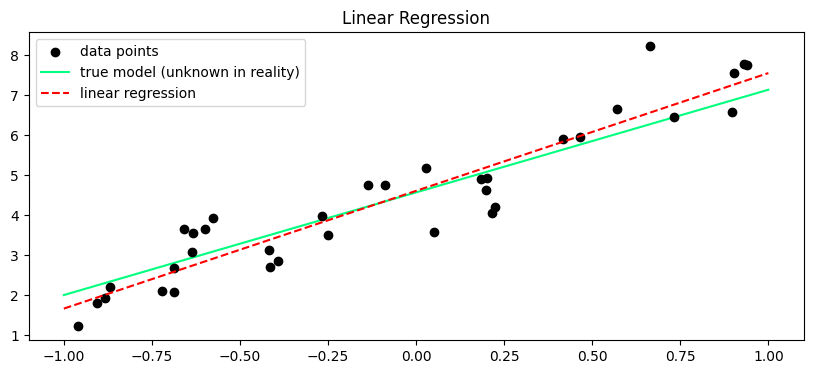

In [10]:
a_star = ((x*y).mean() - x.mean()*y.mean()) / ((x**2).mean() - x.mean()**2)
b_star = y.mean() - a_star *x.mean()


def model(x):
    return a_star * x + b_star


plt.figure(figsize=(10,4))
plt.scatter(x,y,label='data points',c='k');
plt.title("Linear Regression")
plt.plot(xx,true_model(xx),c='springgreen',label='true model (unknown in reality)',zorder=-1)
plt.plot(xx,model(xx),label='linear regression',linestyle='--',c='r');
plt.legend();

# 3bis. Polynomial Regression

Coder une classe `PolynomialRegression` avec : 
- son constructeur `__init__(self, q=2)` où `q` est le degré du polynôme interpolateur
- une méthode `fit(self,x,y)` qui calcule la régression polynômiale de degré `q` aux points `x`,`y`.
- la méthode `__call__(self, x)` qui permettra d'appeler l'instance une fois entraînée et retournera la prédiction du modèle pour le vecteur `x`.
- éventuellement : une méthode `SSE(self,x,y)` qui retournera la SSE du modèle (entraîné) aux points `x`,`y`.

In [11]:
class PolynomialRegression:
    """
    Classe de régression polynômiale.
    """
    def __init__(self, q=2):
        """
        q: degré du polynôme de régression, égal à 2 par défaut.
        """
        self.q = q
        self.fitted = False
        
    def fit(self, x, y):
        """
        Détermine les coefficients optimaux du polynôme de régression.
        """
        A = np.zeros((self.q+1,self.q+1))
        b = np.zeros(self.q+1)
        for i in range(self.q+1):
            for j in range(self.q+1):
                ...
                
            b[i]= ...
            
        self.coeffs = np.linalg.solve(A, b)
        
        self.fitted = True
        
    def SSE(self, x, y):
        """
        Calcule la Sum of the Squared Errors du polynôme de régression aux points (x,y)
        """
        return ((self(x) - y)**2).mean()
    
    def __call__(self, x):
        """
        Permet d'appeler le polynôme de régression.
        """
        if not self.fitted:
            raise Error("This model is not fitted.")
        out = np.sum([coef*x**i for (i,coef) in enumerate(self.coeffs)],axis=0)
        return out

## 3bis.1 Création d'un jeu de données synthétique

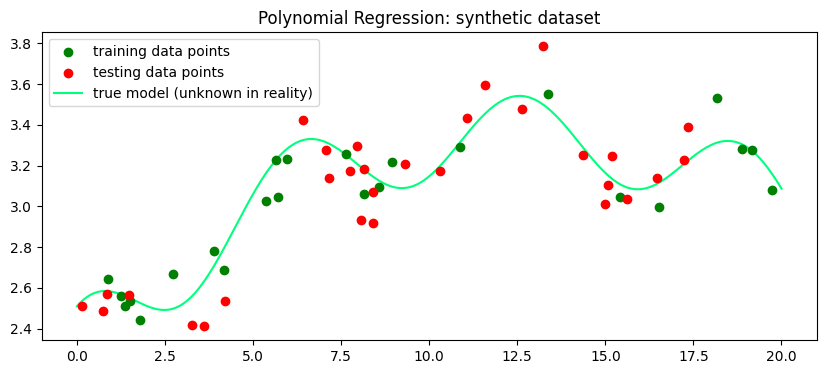

In [12]:
# génération d'un modèle à retrouver :
def true_model(x):
    return np.sqrt(x + 5 + 1.3*np.cos(x**1)- x**2/25)

N = 300
b = 20
xx = np.linspace(0, b, N)

np.random.seed(31)

# training dataset :
n_train = 24
x_train = np.random.uniform(0, b, n_train)
y_train = true_model(x_train) + np.random.normal(0,1/9, n_train)

# testing dataset :
n_test = 30
x_test = np.random.uniform(0, b, n_test)
y_test = true_model(x_test) + np.random.normal(0,1/9, n_test)

# régression polynomiale avec notre clase créée plus haut :
p = PolynomialRegression(q=6)
p.fit(x_train,y_train)

# graphiques :
plt.figure(figsize=(10,4))
plt.title("Polynomial Regression: synthetic dataset")
plt.scatter(x_train,y_train,label='training data points',c='g');
plt.scatter(x_test,y_test,label='testing data points',c='r');
plt.plot(xx,true_model(xx),c='springgreen',label='true model (unknown in reality)',zorder=-1)
# plt.plot(xx,p(xx),label='polyomial regression',linestyle='--',c='r');
plt.legend();

## 3bis.2 Résolution

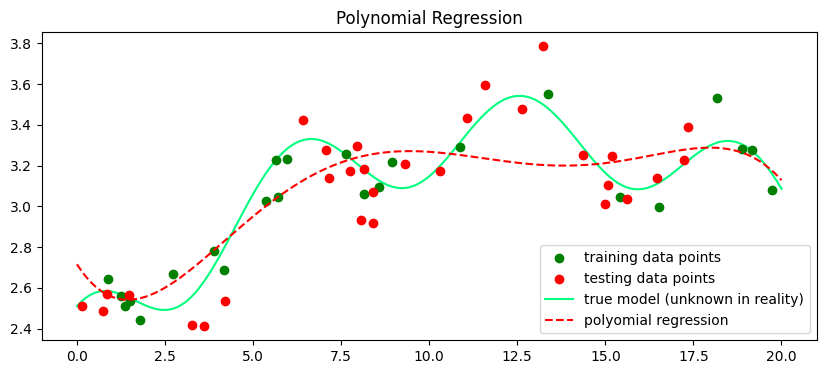

In [13]:
p = PolynomialRegression(q=5)
p.fit(x_train,y_train)

plt.figure(figsize=(10,4))
plt.title("Polynomial Regression")
plt.scatter(x_train,y_train,label='training data points',c='g');
plt.scatter(x_test,y_test,label='testing data points',c='r');
plt.plot(xx,true_model(xx),c='springgreen',label='true model (unknown in reality)',zorder=-1)
plt.plot(xx,p(xx),label='polyomial regression',linestyle='--',c='r');
plt.legend();

## 3bis.3 Underfitting vs Overfitting

En gardant les même jeux de données d'entraînement et de test que précédemment, calculer la SSE sur les deux jeux de données (SSE train et SSE test) pour différent niveaux de complexité du modèle (c-à-d plusieurs valeurs de $q$).

Plotter les `SSE_train` et `SSE_test` obtenues en fonction des différentes valeurs de `q`. Conclure.

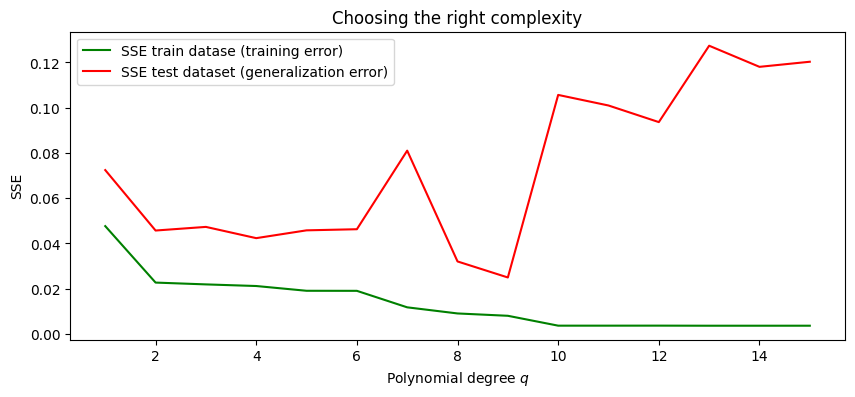

In [14]:
qs = list(range(1,16))
SSEs_train = []
SSEs_test = []
for q in qs:
    p = PolynomialRegression(q=q)
    p.fit(x_train, y_train)
    SSEs_train.append(p.SSE(x_train, y_train))
    SSEs_test.append(p.SSE(x_test, y_test))
    
    
plt.figure(figsize=(10,4))
plt.title("Choosing the right complexity")
plt.plot(qs,SSEs_train, label='SSE train datase (training error)',c='g');
plt.plot(qs,SSEs_test , label='SSE test dataset (generalization error)',c='r');
plt.legend();
plt.xlabel(r'Polynomial degree $q$'); plt.ylabel("SSE");

- en augmentant toujours plus la complexité du modèle, on fait tendre l'erreur d'entraînement vers zéro
- pour l'erreur de généralisation, un modèle trop simple (*sous-apprentissage* ou *underfitting*) ne semble pas optimal. Egalement, quand la complexité devient trop grande, le modèle explique très mal les nouvelles données, on dit qu'il y a *sur-apprentissage* (ou *overfit*) des données d'entraînement.
- le meilleur modèle est donc celui qui minimise l'erreur de généralisation. Ici, on serait tenté de dire $q=9$, mais cela semble chanceux dans cet exemple, mieux vaut prendre $q=5$ ou $6$, qui sera un modèle plus robuste.

<h1><center> 
<img src="../data/overfitting-and-underfitting.png" alt="drawing" width="650"/>
</center></h1>